## Level 2  : Task 1 - Table Booking and Online Delivery

## Determine the percentage of restaurants that offer table booking and online delivery.

## Compare the average ratings of restaurants with table booking and those without.

## Analyze the availability of online delivery among restaurants with different price ranges.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('Dataset.csv')
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
table_booking=(data['Has Table booking']=='Yes').mean()*100
print(f"Restaurants with Table Bookings are: {table_booking:.2f}%")

Restaurants with Table Bookings are: 12.12%


In [6]:
online_delivery=(data['Has Online delivery']=='Yes').mean()*100
print(f"Restaurants with Online Delivery facility are: {online_delivery:.2f}%")

Restaurants with Online Delivery facility are: 25.66%


In [7]:
with_tablebooking=data[data['Has Table booking']=='Yes']['Aggregate rating']
without_tablebooking=data[data['Has Table booking']=='No']['Aggregate rating']

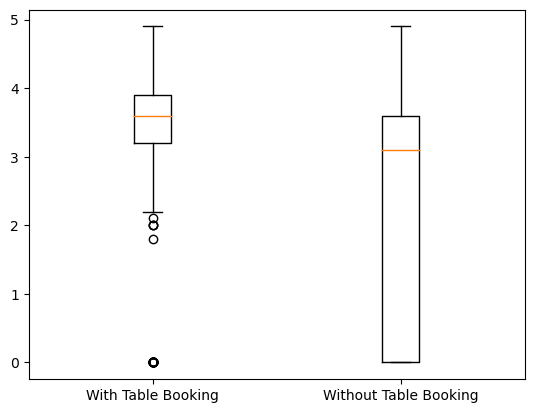

In [8]:
plt.boxplot([with_tablebooking, without_tablebooking], labels=['With Table Booking', 'Without Table Booking'])
plt.show()

In [9]:
price_range=data['Price range']
online_delivery_price={}

for i in price_range:
    online_delivery=(data[data['Price range'] == i]['Has Online delivery'] == 'Yes').mean()*100
    online_delivery_price[i]=online_delivery
    
print('Availability of Online Delivery with different price range: ')
for i, online_delivery in online_delivery_price.items():
    print(f'Price Range {i} : {online_delivery : .2f}%')

Availability of Online Delivery with different price range: 
Price Range 3 :  29.19%
Price Range 4 :  9.04%
Price Range 2 :  41.31%
Price Range 1 :  15.77%


## Level 2 : Task 2 - Price Range Analysis

## Determine the most common price range among all the restaurants.

## Calculate the average rating for each price range.

## Identify the color that represents the highest average rating among different price ranges.

In [10]:
common_price_ranges=data['Price range'].mode()[0]
print(f'Most common price range among all restaurants is : {common_price_ranges}')

Most common price range among all restaurants is : 1


In [11]:
average_rating=data.groupby('Price range')['Aggregate rating'].mean()
average_rating

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

In [12]:
highest_colour_rating=data.groupby('Rating color')['Aggregate rating'].mean()
highest_colour_rating

Rating color
Dark Green    4.659801
Green         4.168119
Orange        3.051619
Red           2.297849
White         0.000000
Yellow        3.683429
Name: Aggregate rating, dtype: float64

## Level 2 : Task 3 - Feature Engineering

## Extract additional features from the existing columns, such as the length of the restaurant name or address.

## Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [13]:
data['Restaurant Name Length'] = data['Restaurant Name'].apply(len)
data['Restaurant Address Length']=data['Address'].apply(len)
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Restaurant Address Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,11,64


In [14]:
data['Has Table Booking']=np.where(data['Has Table booking'] == 'Yes', 1,0)
data['Has Online Booking']=np.where(data['Has Online delivery'] == 'Yes',1,0)
data[['Has Table Booking', 'Has Online Booking']]

,Has Table Booking,Has Online Booking
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
9546,0,0
9547,0,0
9548,0,0
9549,0,0


## Level 3 - Task 1 : Predictive Modeling

## Build a regression model to predict the aggregate rating of a restaurant based on available features.

## Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics

## Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

In [15]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Restaurant Address Length,Has Table Booking,Has Online Booking
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0


## Data Preprocessing

In [16]:
features=['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes', 'Has Table Booking', 'Has Online Booking']
target='Aggregate rating'

data=data.dropna(subset=features+[target])

In [17]:
x=data[features]
y=data[target]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Initialize and train different models

In [20]:
linear_model=LinearRegression()
decision_tree_model=DecisionTreeRegressor(random_state=42)
random_forest_model=RandomForestRegressor(n_estimators=100, random_state=42)

### Train Models

In [21]:
linear_model.fit(x_train, y_train)
decision_tree_model.fit(x_train, y_train)
random_forest_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

### Predictions using models

In [22]:
linear_predict=linear_model.predict(x_test)
decision_tree_predict=decision_tree_model.predict(x_test)
random_forest_predict=random_forest_model.predict(x_test)

### Evaluate model performance

In [23]:
models=['Linear Regression', 'Decision Tree', 'Random Forest']
predictions=[linear_predict, decision_tree_predict, random_forest_predict]

In [24]:
for j, model_name in enumerate(models):
    mse=mean_squared_error(y_test, predictions[j])
    r2=r2_score(y_test, predictions[j])
    print(f'{model_name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R-Squared: {r2}')
    print('--------------------------------')

Linear Regression:
Mean Squared Error: 1.6559894412175729
R-Squared: 0.2724472122082313
--------------------------------
Decision Tree:
Mean Squared Error: 0.18943746729461014
R-Squared: 0.916771354930217
--------------------------------
Random Forest:
Mean Squared Error: 0.09665828013896155
R-Squared: 0.957533544944252
--------------------------------


## Level 3 - Task 2 :Customer Preference Analysis

## Analyze the relationship between the type of cuisine and the restaurant's rating

## Identify the most popular cuisines among customers based on the number of votes

## Determine if there are any specific cuisines that tend to receive higher ratings.

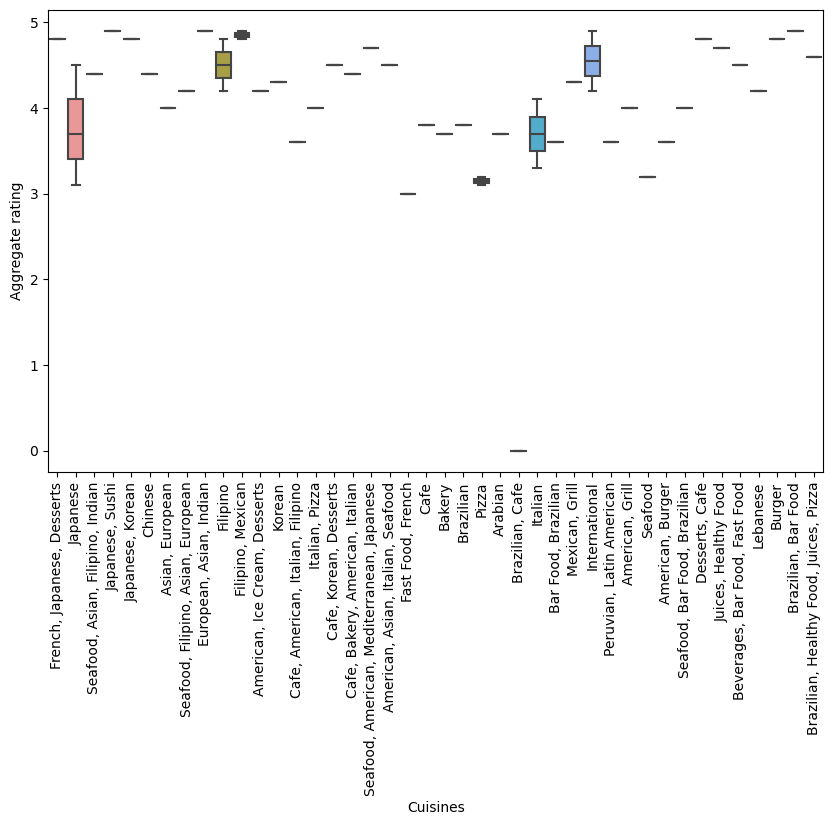

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=data.head(50))
plt.xticks(rotation=90)
plt.show()

In [26]:
most_popular_cuisines=data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
print('**************Most Popular Cuisines are *******************')
most_popular_cuisines.head(10)

**************Most Popular Cuisines are *******************


Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64

In [27]:
higher_ratings_cuisines=data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print('*************Cuisines with Higher average ratings*****************')
higher_ratings_cuisines.head(10)

*************Cuisines with Higher average ratings*****************


Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64

## Level 3 - Task 3: Data Visualization

## Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).

## Compare the average ratings of different cuisines or cities using appropriate visualizations.

## Visualize the relationship between various features and the target variable to gain insights

### Distribution of ratings using Histogram

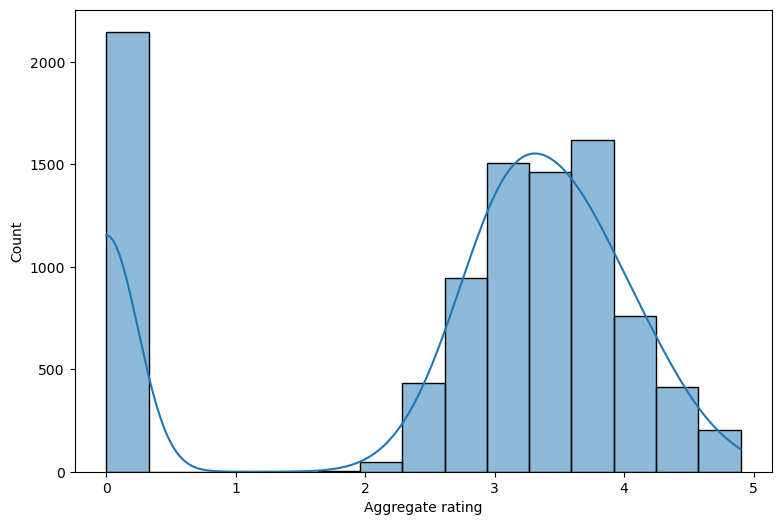

In [28]:
plt.figure(figsize=(9,6))
sns.histplot(data['Aggregate rating'], bins=15, kde=True)
plt.show()

### Bar plot using ratings

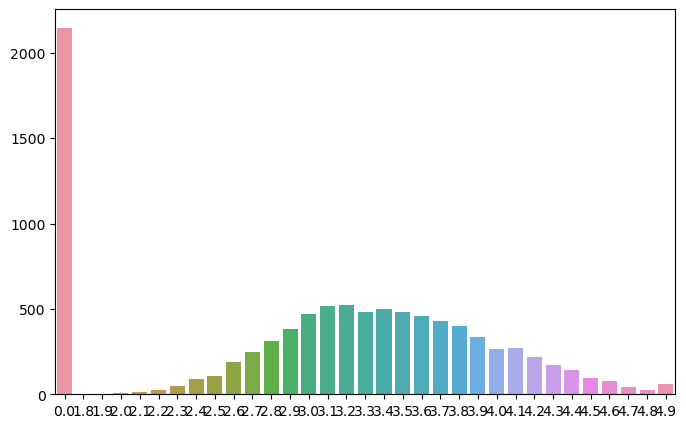

In [29]:
plt.figure(figsize=(8,5))
rating_count=data['Aggregate rating'].value_counts()
sns.barplot(x=rating_count.index, y=rating_count.values)
plt.show()

### Average rating per cuisine

In [48]:
average_rating=data.groupby('Cuisines')['Aggregate rating'].mean()
average_rating=average_rating.sort_values(ascending=False)
average_rating=average_rating.head(35)
average_rating

Cuisines
Italian, Deli                            4.900000
Hawaiian, Seafood                        4.900000
American, Sandwich, Tea                  4.900000
Continental, Indian                      4.900000
European, Asian, Indian                  4.900000
European, Contemporary                   4.900000
European, German                         4.900000
BBQ, Breakfast, Southern                 4.900000
American, Coffee and Tea                 4.900000
Sunda, Indonesian                        4.900000
American, Burger, Grill                  4.900000
Mughlai, Lucknowi                        4.900000
Mexican, American, Healthy Food          4.900000
American, Caribbean, Seafood             4.900000
Burger, Bar Food, Steak                  4.900000
Italian, Bakery, Continental             4.900000
World Cuisine                            4.900000
American, BBQ, Sandwich                  4.900000
Filipino, Mexican                        4.850000
Italian, American, Pizza                 

In [38]:
top_rated_cuisines=average_rating.head(10)
top_rated_cuisines

Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64

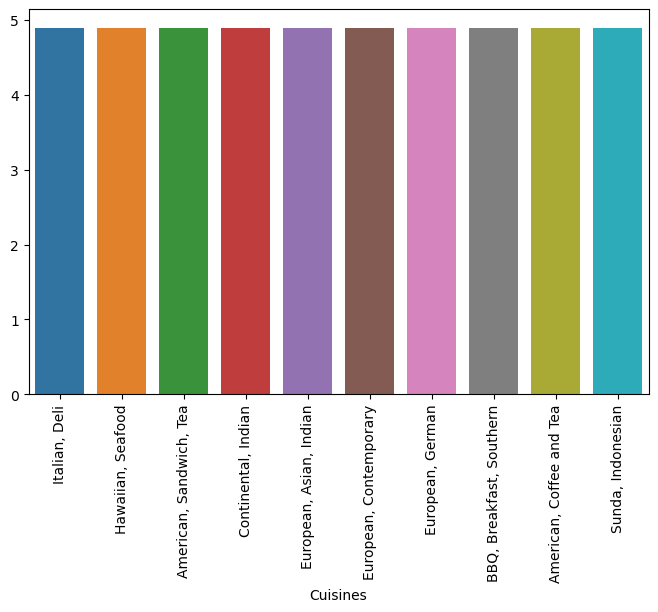

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_rated_cuisines.index, y=top_rated_cuisines.values)
plt.xticks(rotation=90)
plt.show();

### Average rating by cuisine

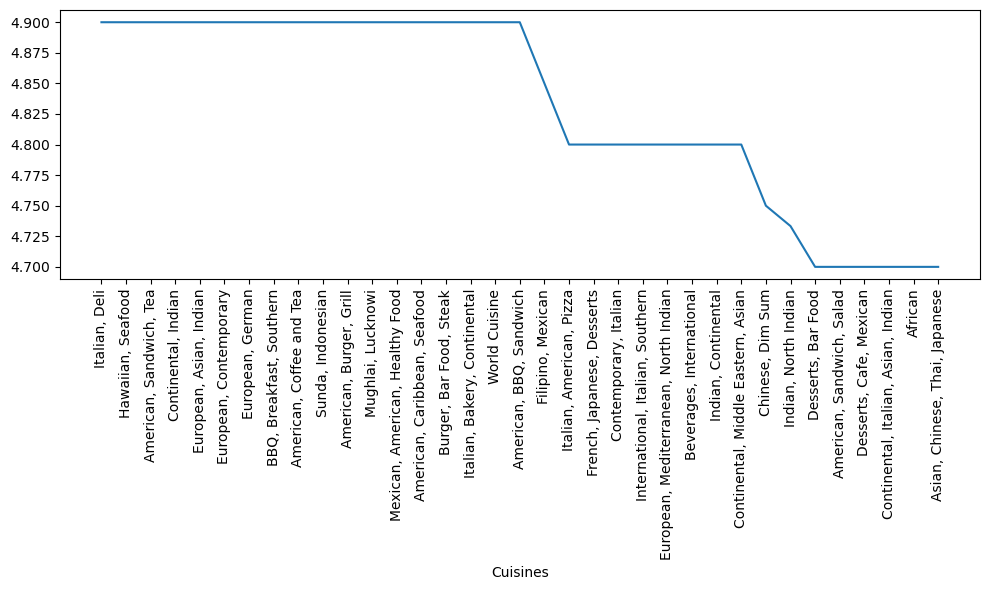

In [49]:
plt.figure(figsize=(10,6))
sns.lineplot(x=average_rating.index, y=average_rating.values)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

### Average rating by city

In [55]:
average_rating_city=data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
average_rating_city=average_rating_city.head(35)

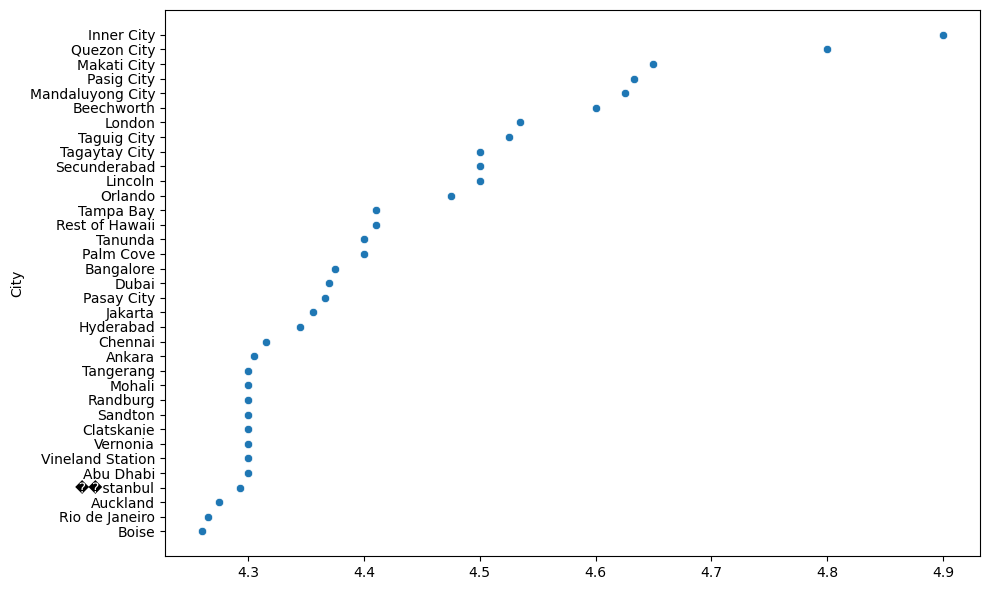

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=average_rating_city.values, y=average_rating_city.index)
plt.tight_layout()
plt.show()

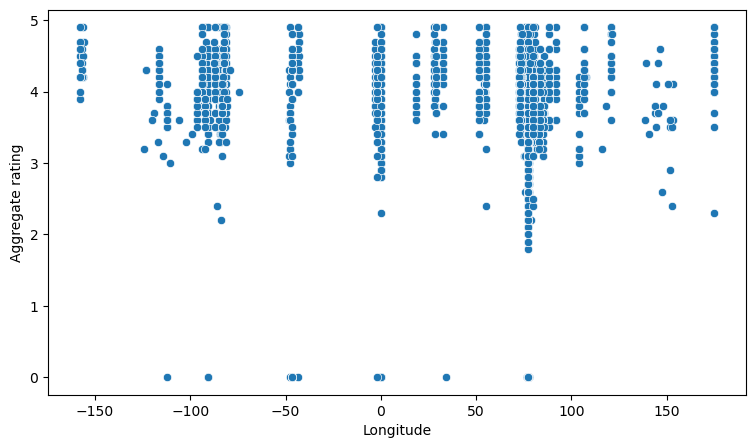

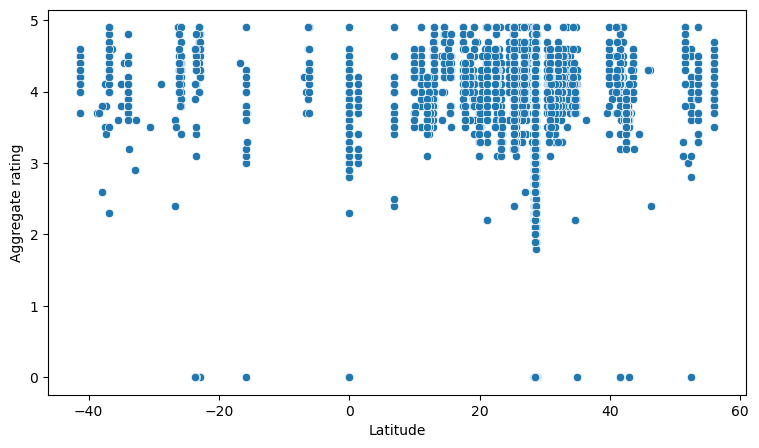

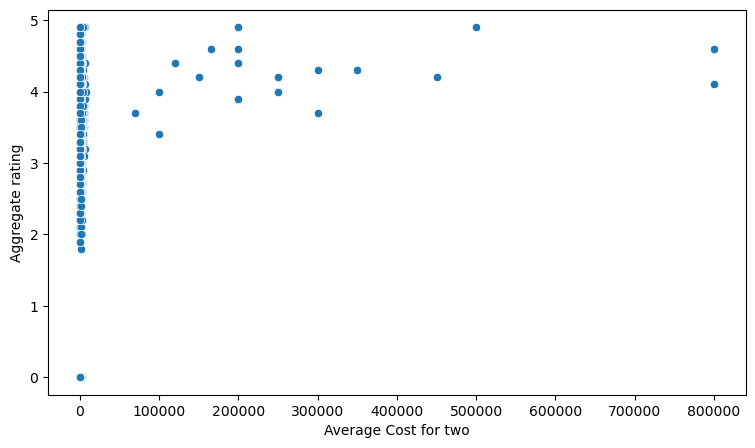

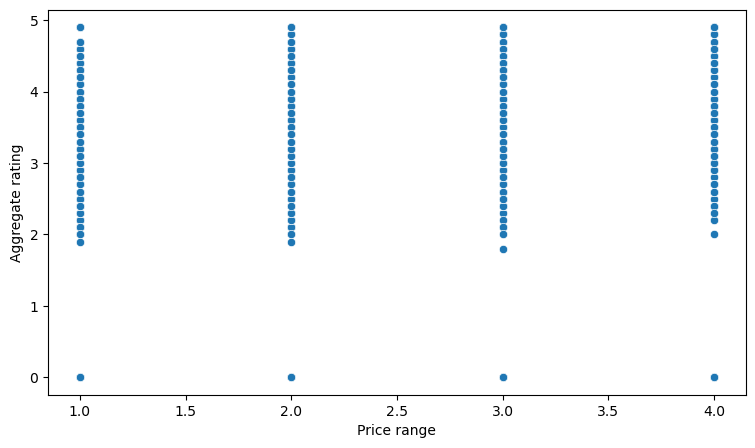

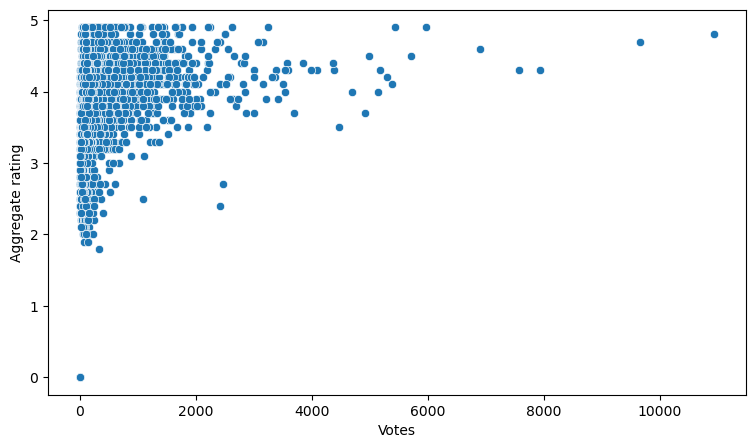

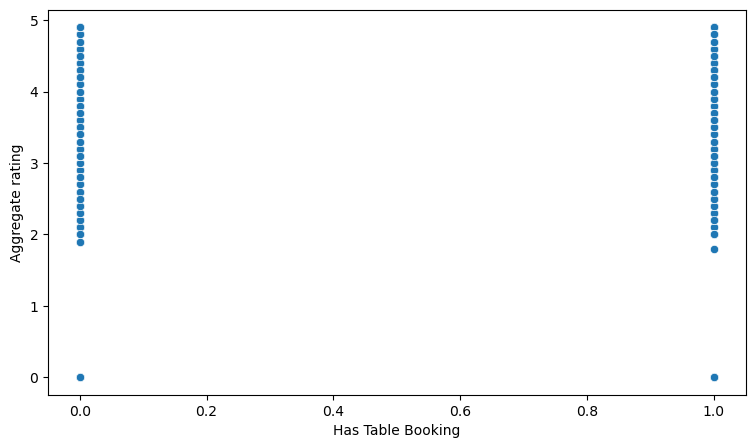

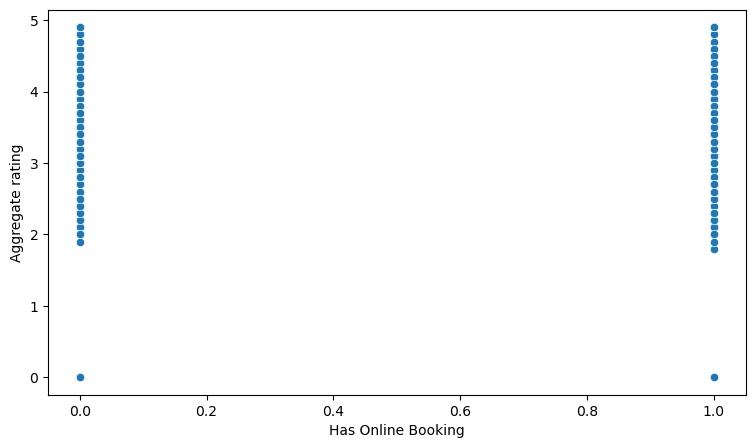

In [59]:
for i in features:
    plt.figure(figsize=(9,5))
    sns.scatterplot(x=data[i], y=data[target])
    plt.show()

In [60]:
cat_features=['Has Table Booking', 'Has Online Booking']

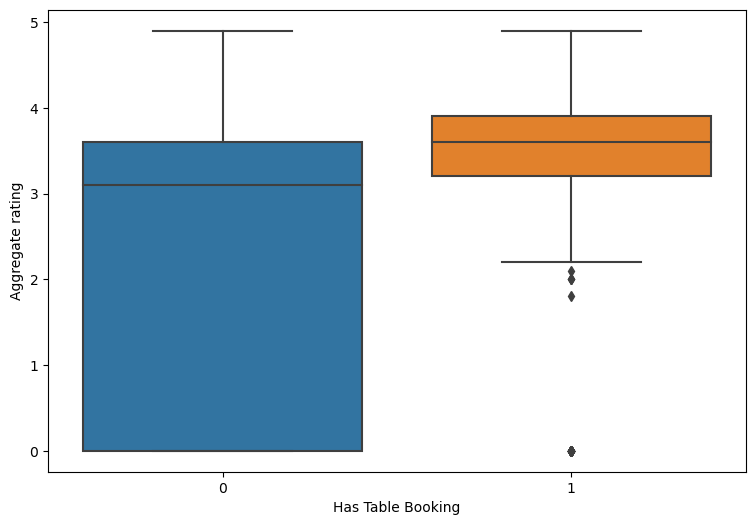

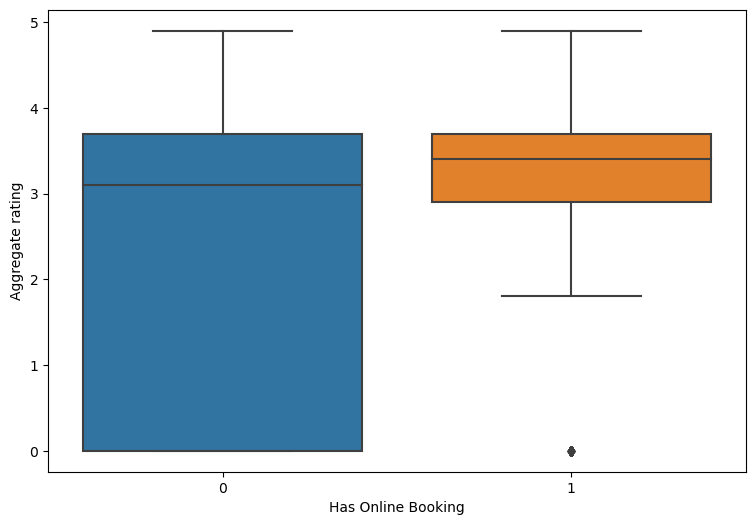

In [61]:
for i in cat_features:
    plt.figure(figsize=(9,6))
    sns.boxplot(x=data[i], y=data[target])
    plt.show()